In [2]:
pip install -q tensorflow-io

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 20.4 MB/s eta 0:00:00


In [3]:
!curl -o sample.jpg -L https://storage.googleapis.com/download.tensorflow.org/example_images/320px-Felis_catus-cat_on_snow.jpg


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 17858  100 17858    0     0  73951      0 --:--:-- --:--:-- --:--:-- 74099


In [4]:
!ls -ls sample.jpg

20 -rw-r--r-- 1 root root 17858 Oct 29 19:27 sample.jpg


In [5]:
import tensorflow as tf

In [6]:
import tensorflow_io as tfio

In [7]:
image = tf.image.decode_jpeg(tf.io.read_file('sample.jpg'))

In [8]:
print(image.shape, image.dtype)

(213, 320, 3) <dtype: 'uint8'>


In [9]:
import matplotlib.pyplot as plt

In [10]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

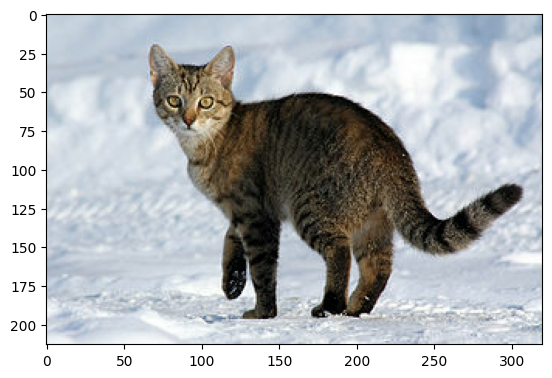

In [11]:
plt.imshow(image)

(0.0, 1.0, 0.0, 1.0)

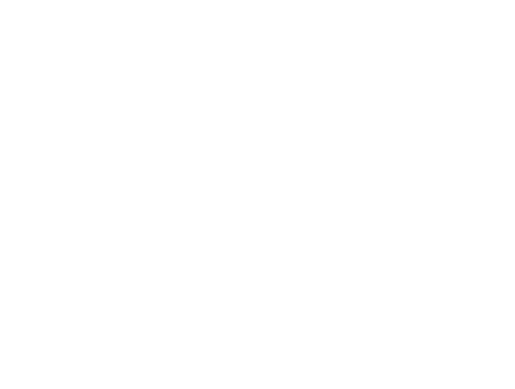

In [12]:
plt.axis('off')

In [13]:
plt.show()

In [14]:
grayscale = tfio.experimental.color.rgb_to_grayscale(image)

In [15]:
print(grayscale.shape, grayscale.dtype)

(213, 320, 1) <dtype: 'uint8'>


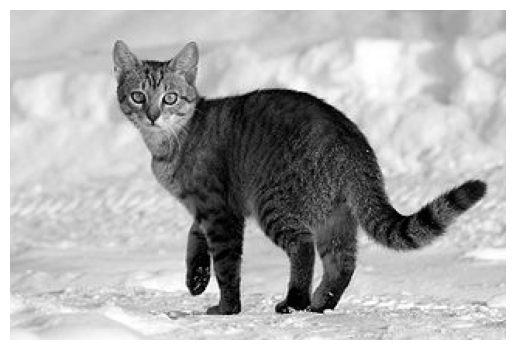

In [16]:
plt.figure()
plt.imshow(tf.squeeze(grayscale, axis=-1), cmap='gray')
plt.axis('off')
plt.show()


(213, 320, 3) <dtype: 'uint8'>


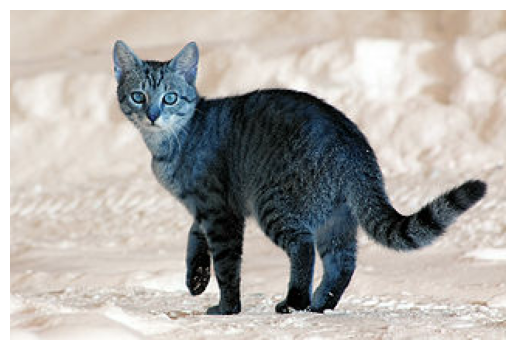

In [17]:
bgr = tfio.experimental.color.rgb_to_bgr(image)
print(bgr.shape, bgr.dtype)
plt.figure()
plt.imshow(bgr)
plt.axis('off')
plt.show()

In [18]:
image_float32 = tf.cast(image, tf.float32) / 255.0
xyz_float32 = tfio.experimental.color.rgb_to_xyz(image_float32)

In [19]:
xyz = tf.cast(xyz_float32 * 255.0, tf.uint8)
print(xyz.shape, xyz.dtype)

(213, 320, 3) <dtype: 'uint8'>


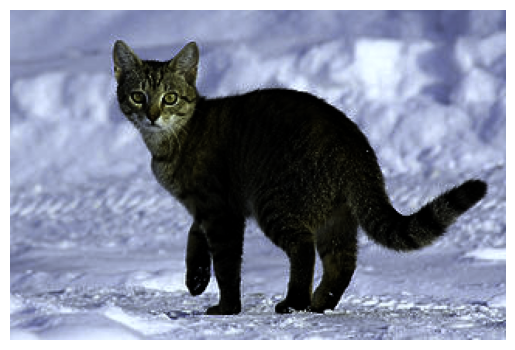

In [20]:
plt.figure()
plt.imshow(xyz)
plt.axis('off')
plt.show()

(213, 320, 3) <dtype: 'uint8'>


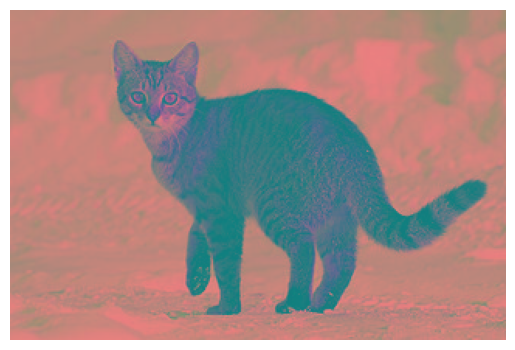

In [21]:
ycbcr = tfio.experimental.color.rgb_to_ycbcr(image)
print(ycbcr.shape, ycbcr.dtype)
plt.figure()
plt.imshow(ycbcr, cmap='gray')
plt.axis('off')
plt.show()


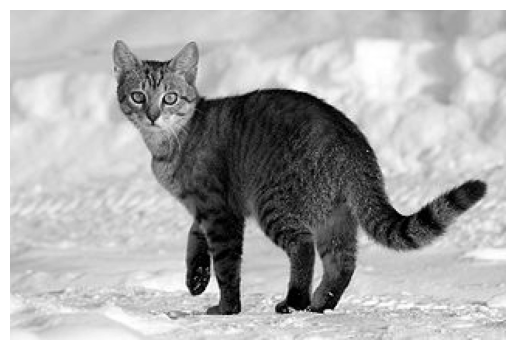

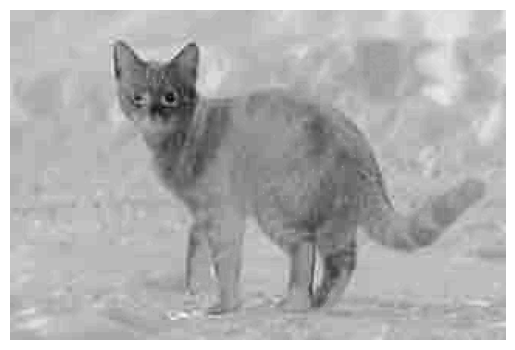

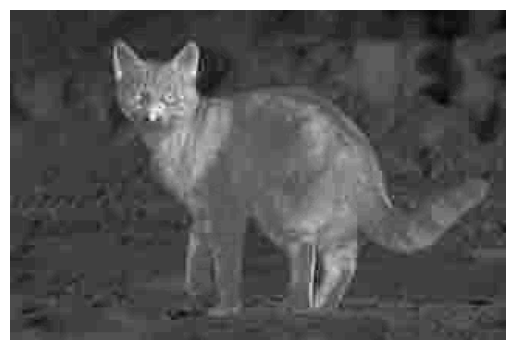

In [22]:
y, cb, cr = ycbcr[:,:,0], ycbcr[:,:,1], ycbcr[:,:,2]
#Y' component
plt.figure()
plt.imshow(y, cmap='gray')
plt.axis('off')
plt.show()
#cb component
plt.figure()
plt.imshow(cb, cmap='gray')
plt.axis('off')
plt.show()
#cr component
plt.figure()
plt.imshow(cr, cmap='gray')
plt.axis('off')
plt.show()

In [23]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
from PIL import Image
import  matplotlib.pylab as plt

In [24]:
urls= ["https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
"https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg",
"https://placekitten.com/800/571"]

for url in urls :
  image=io.imread(url)
  image_2=cv.cvtColor(image, cv.COLOR_BGR2RGB)
  final_frame=cv.hconcat((image, image_2))
  cv2_imshow(final_frame)
  print('\n')

Output hidden; open in https://colab.research.google.com to view.

In [25]:
print(image.dtype)
print(image.shape[0])
print(image.shape[1])
print(image.shape[2])


uint8
571
800
3


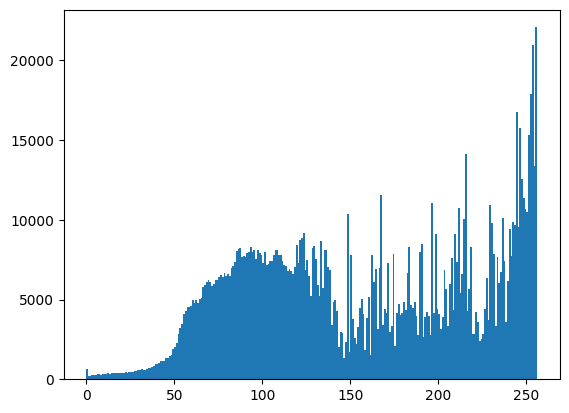

In [26]:
plt.hist(image.ravel(),bins = 256, range = [0,256])
plt.show()

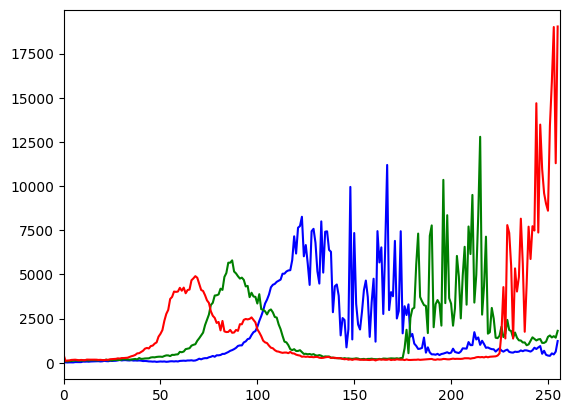

In [27]:
color = ('b', 'g', 'r')
for i, col in enumerate(color):
  histr = cv.calcHist([image],[i],None,[256],[0,256])
  plt.plot(histr,color = col)
  plt.xlim([0,256])
plt.show()

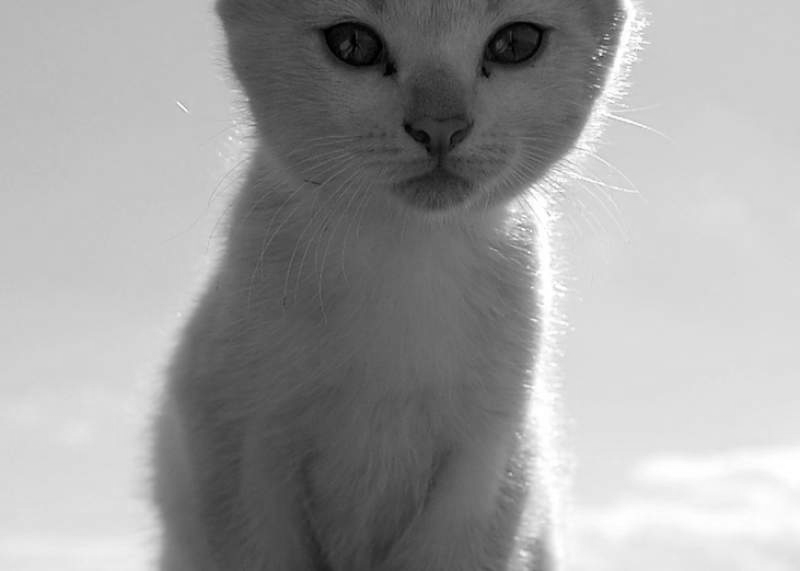

In [28]:
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

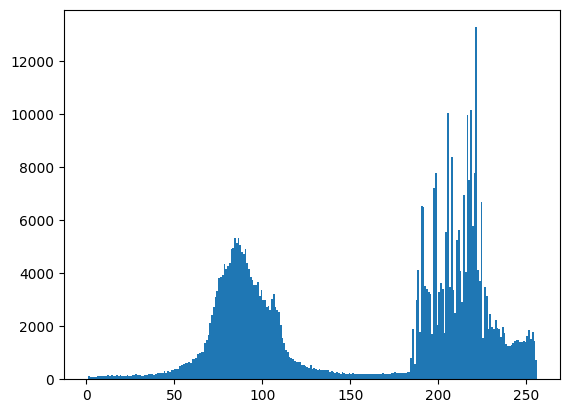

In [29]:
plt.hist(gray_image.ravel(),bins = 256, range = [0,256])
plt.show()

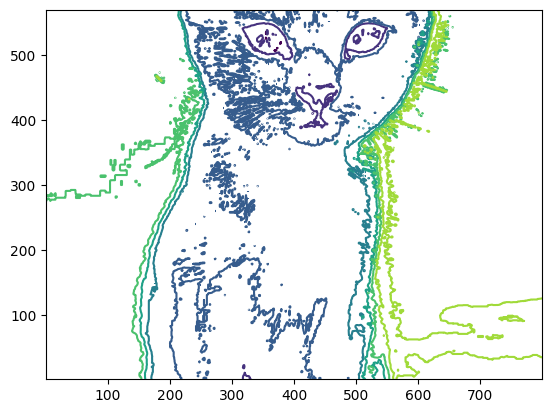

In [30]:
plt.contour(gray_image, origin = 'image')

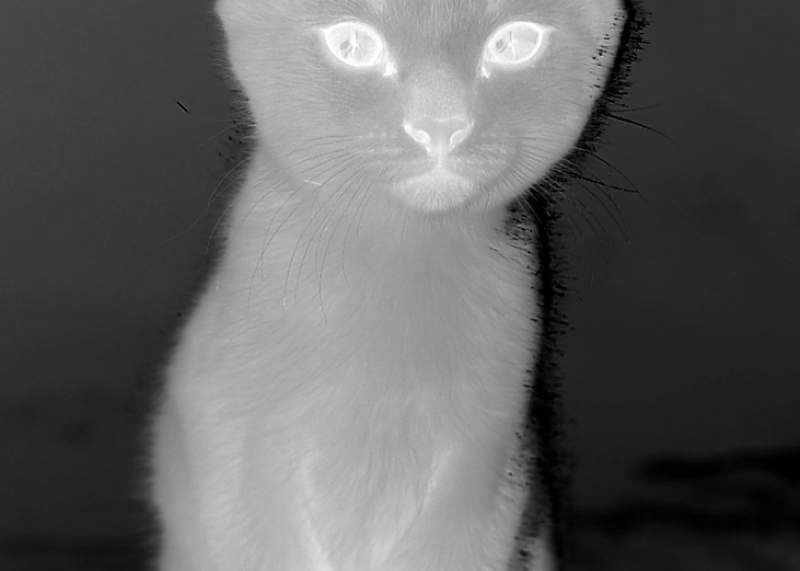

In [31]:
im2 = 255 - gray_image
cv2_imshow(im2)

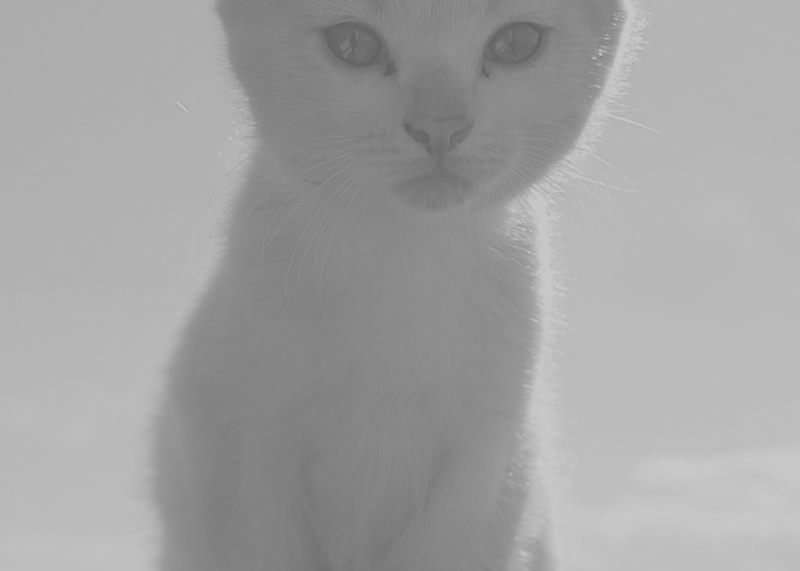

In [32]:
im3 = (100.0/255)*gray_image + 100
cv2_imshow(im3)

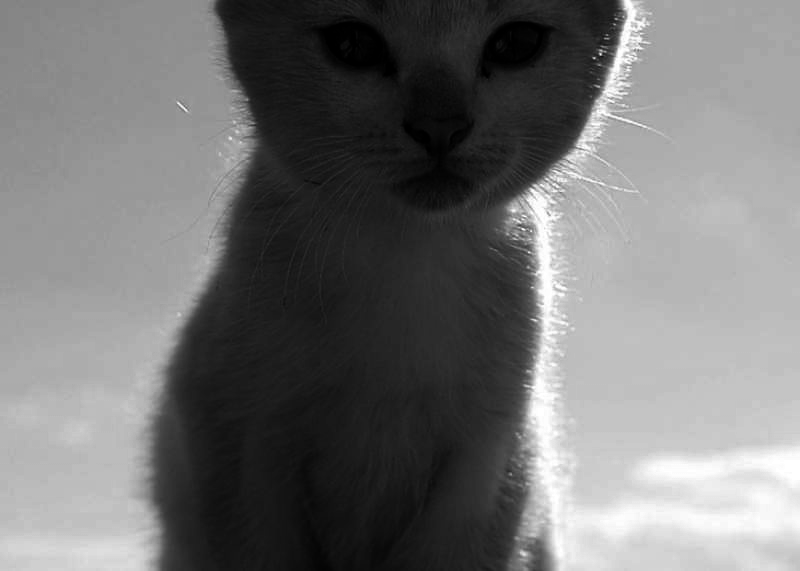

In [33]:
im4 = 255.0*(gray_image/255.0)**2
cv2_imshow(im4)

In [35]:
def hiteq(im,nbr_bins = 256):
  """histogram equalization of a grayscale image"""
  imhist, bins=np.histogram(im.flatten(), nbr_bins, [0,256])
  cdf=imhist.cumsum()
  cdf= imhist.max()*cdf/cdf.max()
  cdf_mask = np.ma.masked_equal(cdf, 0)
  cdf_mask = (cdf_mask - cdf_mask.mon())*255/(cdf_mask.max()-cdf_mask.min())
  cdf_mask = np.ma.filled(cdf_mask, 0).astype('uint8')
  return cdf[im.astype('uint8')]
  im5 = histeq(im4)
  cv2_imshow(im5)


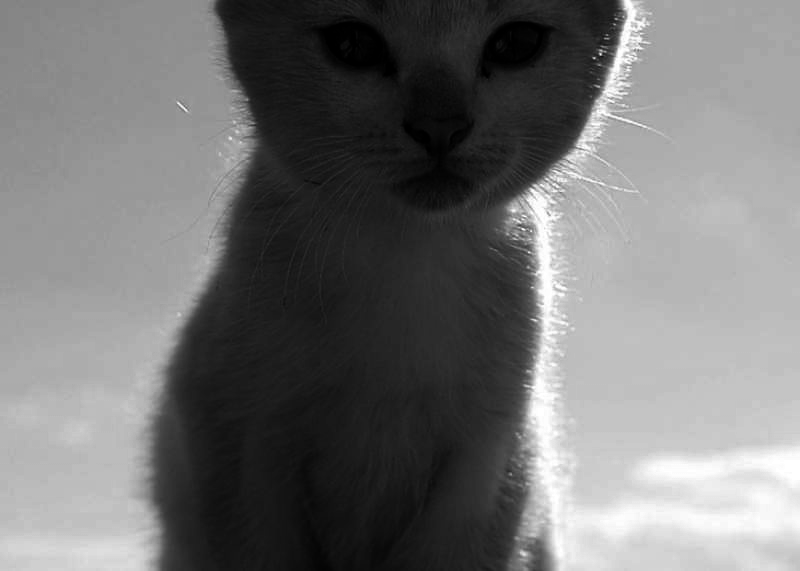

In [36]:
im5 = 255.0*(gray_image/255.0)**2
cv2_imshow(im5)

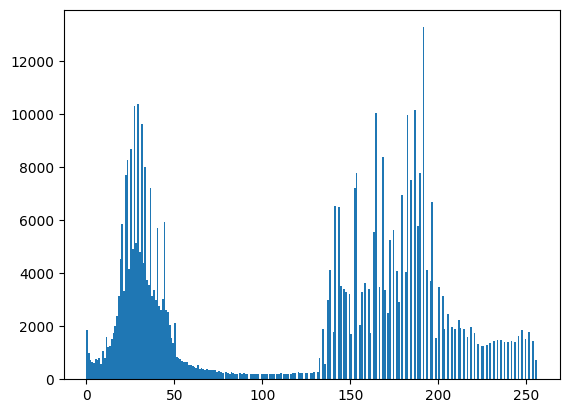

In [37]:
plt.hist(im4.ravel(),bins = 256, range = [0,256])
plt.show()

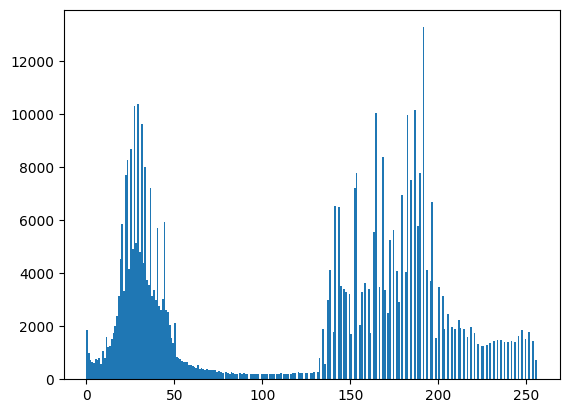

In [38]:
plt.hist(im5.ravel(),bins = 256, range = [0,256])
plt.show()

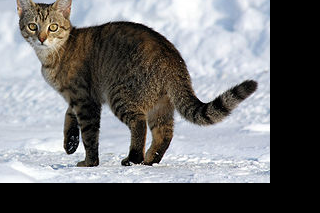

In [42]:
from PIL import Image

# Chargez l'image source
image_source = Image.open("/content/sample.jpg")

# Définissez les valeurs de translation (déplacement) en pixels
dx = 50
dy = 30
# Effectuez la translation de l'image
image_translate = image_source.copy()
image_translate = image_translate.transform(image_translate.size, Image.AFFINE, (1, 0, dx, 0, 1, dy))
image_translate


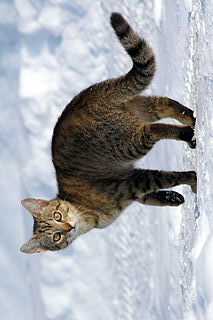

In [43]:
# Effectuez la rotation de 90 degrés
image_rotated = image_source.transpose(Image.ROTATE_90)
image_rotated